<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%; text-align:left">

<h2 align="center"><font color=#000000>CIFAR-10 Dataset</h2>

The CIFAR-10 dataset contains 60,000 color images, each of size 32x32 pixels, the dataset is devided into 10 classes.<br>
The classes are:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

</font>

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #4eaaea; font-size:125%; text-align:left">

<h2 align="center"><font color=#000000>Table of Contents</h2>

- [<font color=#000000>Step 1 | Import Libraries](#import)
- [<font color=#000000>Step 2 | Data Preparation and Exploration](#exploration)
- [<font color=#000000>Step 3 |Data Augmentation](#preprocessing)
- [<font color=#000000>Step 4 | Models Architecture](#models)
- [<font color=#000000>Step 5 | Training curves](#train)
- [<font color=#000000>Step 6 | Evaluating the Models on Test Data, Results](#evaluation)
</font>

<a id="import"></a>
# <p style="background-color:#4eaaea; font-family:calibri; color:black; font-size:135%; text-align:center; border-radius:20px 5px;">Step 1 | Import Necessary Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
!pip install -r requirements.txt

In [23]:
import matplotlib.pyplot as plt
import collections
from utils.Dataset import CustomImageDataset
from utils.utils import class_number_to_name
import torch, torchsummary
from utils.models import ConvNet_1, ConvNet_2, ResNet18
import numpy as np
print("Torch version: ", torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device: ", device)

Torch version:  2.3.1+cu121
Device:  cuda


<a id="exploration"></a>
# <p style="background-color:#4eaaea; font-family:calibri; color:black; font-size:135%; text-align:center; border-radius:20px 5px;">Step 2 | Data Preparation and Exploration</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%">
<font color=#000000>
The data for the project was downloaded from the official CIFAR-10 webpage.<br>
It is stored in /data/cifar-10-batches-py.<br>
Since it is not so easy to open and use it, I've created CustomImageDataset class.<br>

The images distribution in classes and examples are follows:

</font>

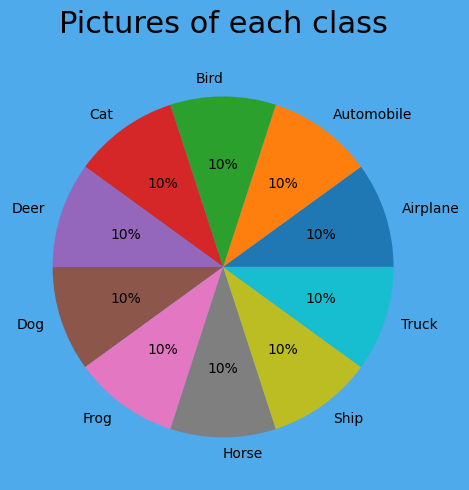

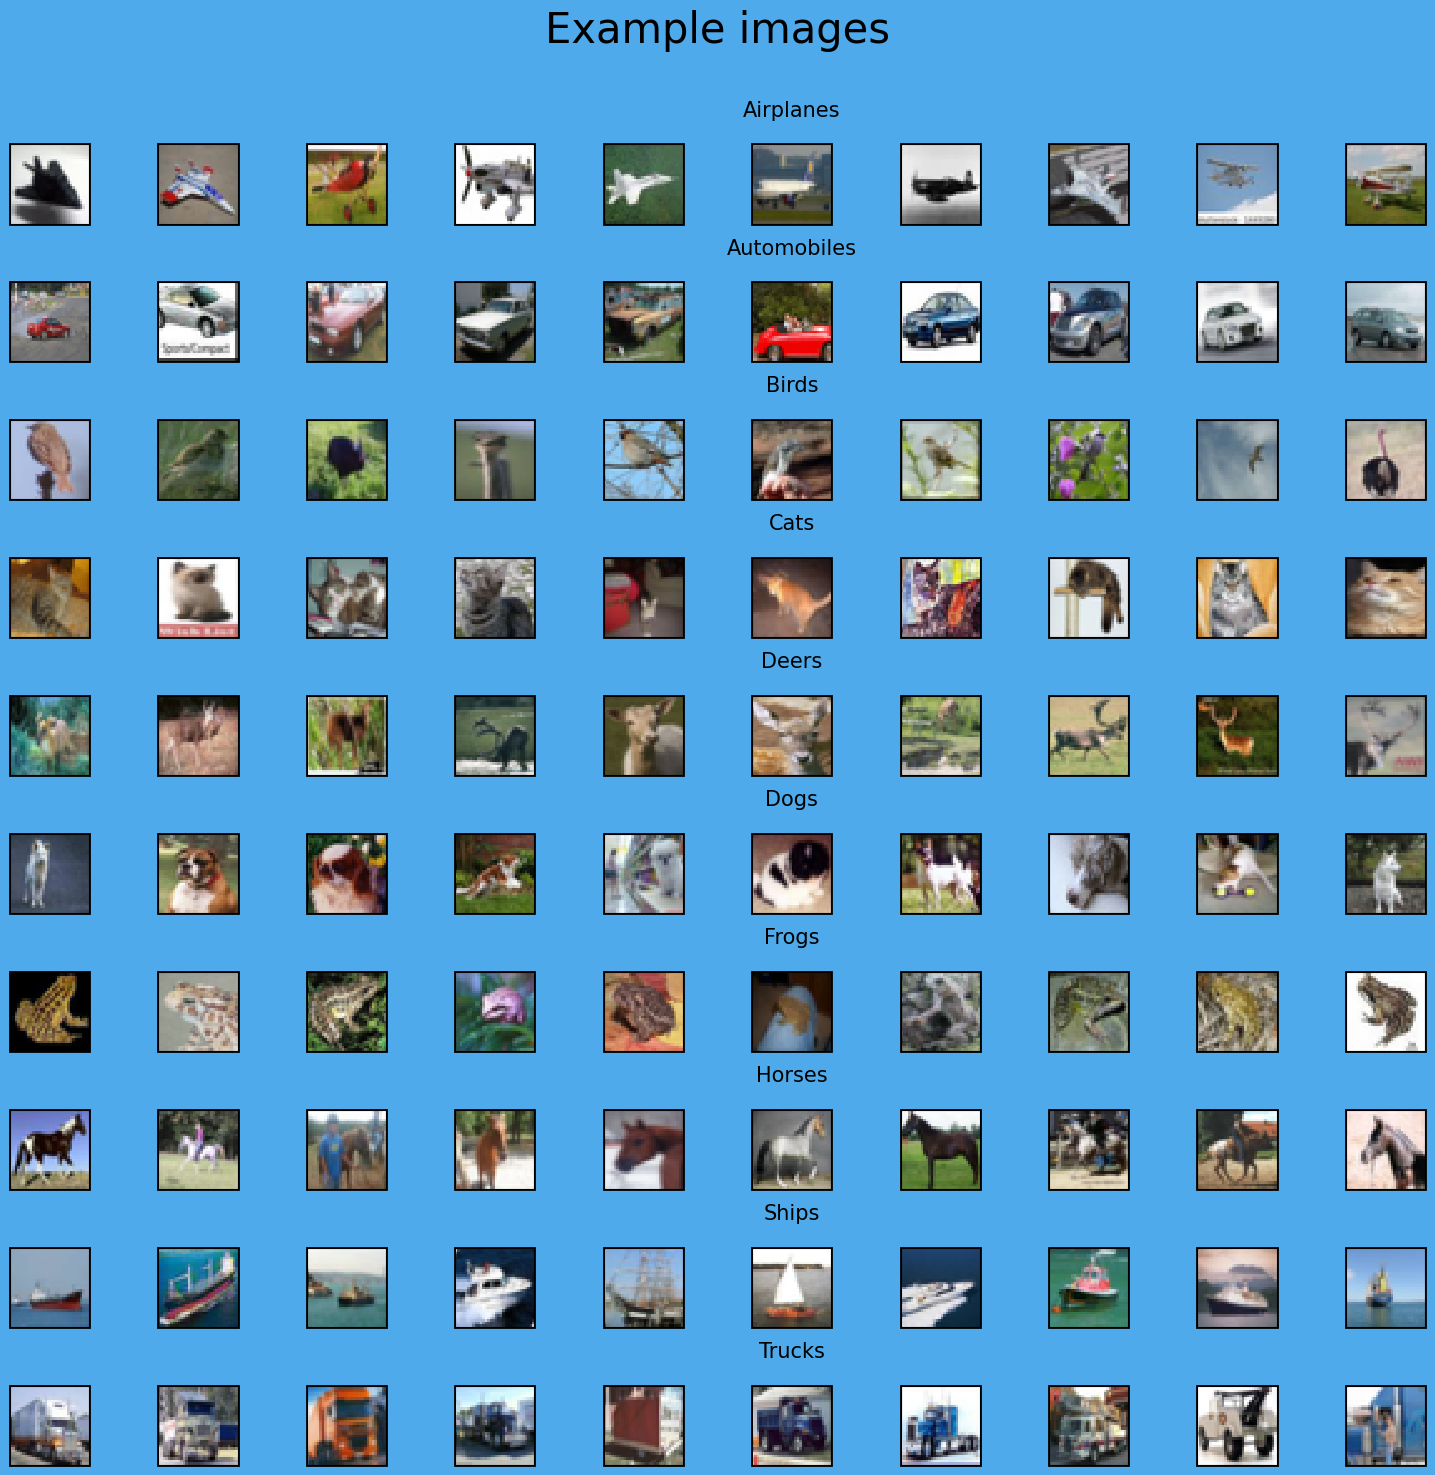

In [3]:
dataset = CustomImageDataset()
dataset.load_batch('data/cifar-10-batches-py/data_batch_1')
dataset.load_batch('data/cifar-10-batches-py/data_batch_2')
dataset.load_batch('data/cifar-10-batches-py/data_batch_3')
dataset.load_batch('data/cifar-10-batches-py/data_batch_4')
dataset.load_batch('data/cifar-10-batches-py/data_batch_5')
dataset.load_batch('data/cifar-10-batches-py/test_batch')

labels = list(dataset.data.values())
fig, ax = plt.subplots(figsize=(11,5), facecolor='#4eaaea')
fig.patch.set(lw=5, ec='#4eaaea')
counter = collections.Counter(labels)
categories = [name.capitalize() for name in list(class_number_to_name.values())]
counts = [counter[i] for i in range(10)]
ax.set_title('Pictures of each class', pad=15, fontsize=22)
ax.pie(counts, labels=categories, autopct='%1.0f%%')
fig.tight_layout()
plt.show();

examples_in_row = 10
fig, axs = plt.subplots(10, examples_in_row, figsize=(15,15), facecolor='#4eaaea')
fig.suptitle("Example images\n", fontsize=30)
fig.patch.set(lw=5, ec='#4eaaea')

for i in range(examples_in_row*10):
    img, label = dataset.get_class_images(i//examples_in_row)[i]
    axs[i//examples_in_row,i%examples_in_row].imshow(np.transpose(img.numpy(), (1, 2, 0)), interpolation='nearest')
    axs[i//examples_in_row,i%examples_in_row].yaxis.set_visible(False)
    axs[i//examples_in_row,i%examples_in_row].xaxis.set_visible(False)
    axs[i//examples_in_row,i%examples_in_row].patch.set(lw=2, ec='black')
    if i%examples_in_row == examples_in_row//2:
        axs[i//examples_in_row,i%examples_in_row].set_title(label=f"{class_number_to_name[label].capitalize()}s", fontsize=15,pad=20)
fig.tight_layout()
plt.show();

<a id="preprocessing"></a>
# <p style="background-color:#4eaaea; font-family:calibri; color:black; font-size:135%; text-align:center; border-radius:20px 5px;">Step 3 |Data Augmentation</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%">
<font color=#000000>Data augmentation stratagy is to create copy of the training set(40k images).<br>
Transformations are:

- RandomCrop with esired output size of the crop is 32 and padding 4
- 50% chance horizontal flip
- Simple color jitter(brightness=0.3, contrast=0.3, saturation=0.3)
- Random rotation from -15 ot 15 degrees.

Examples of transformations:

<img src="data/transform_frog.png" style="width:700px;">
<img src="data/transform_truck.png" style="width:700px;">

After all transfromations we will get 80k images in the training set.
</font>

<a id="models"></a>
# <p style="background-color:#4eaaea; font-family:calibri; color:black; font-size:135%; text-align:center; border-radius:20px 5px;">Step 4 | Models Architecture</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%">
<font color=#000000>

I have 3 models compared.<br>
They are:

- Simple convolutional network with 2 conv layers.
- More complicated convolutional network with 3 conv layers and drop-out.
- ResNet18

They summaries are:
</font>

In [4]:
print("Simple convolutional network")
torchsummary.summary(
    model=ConvNet_1(), 
    input_size=(3, 32, 32), 
    batch_size=32, 
    device="cpu"
)

Simple convolutional network
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [32, 6, 28, 28]             456
         MaxPool2d-2            [32, 6, 14, 14]               0
            Conv2d-3           [32, 16, 10, 10]           2,416
         MaxPool2d-4             [32, 16, 5, 5]               0
            Linear-5                  [32, 120]          48,120
            Linear-6                   [32, 84]          10,164
            Linear-7                   [32, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 1.98
Params size (MB): 0.24
Estimated Total Size (MB): 2.59
----------------------------------------------------------------


In [5]:
print("More complicated network")
torchsummary.summary(
    model=ConvNet_2(), 
    input_size=(3, 32, 32), 
    batch_size=32, 
    device="cpu"
)

More complicated network
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 32, 32]             896
       BatchNorm2d-2           [32, 32, 32, 32]              64
         MaxPool2d-3           [32, 32, 16, 16]               0
            Conv2d-4           [32, 64, 16, 16]          18,496
       BatchNorm2d-5           [32, 64, 16, 16]             128
         MaxPool2d-6             [32, 64, 8, 8]               0
            Conv2d-7            [32, 128, 8, 8]          73,856
       BatchNorm2d-8            [32, 128, 8, 8]             256
         MaxPool2d-9            [32, 128, 4, 4]               0
           Linear-10                  [32, 512]       1,049,088
          Dropout-11                  [32, 512]               0
           Linear-12                   [32, 10]           5,130
Total params: 1,147,914
Trainable params: 1,147,914
Non-trainable params: 0
--

In [6]:
print("ResNet18")
torchsummary.summary(
    model=ResNet18(), 
    input_size=(3, 32, 32), 
    batch_size=32, 
    device="cpu"
)

ResNet18
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 64, 32, 32]           1,792
       BatchNorm2d-2           [32, 64, 32, 32]             128
            Conv2d-3           [32, 64, 32, 32]          36,928
       BatchNorm2d-4           [32, 64, 32, 32]             128
            Conv2d-5           [32, 64, 32, 32]          36,928
       BatchNorm2d-6           [32, 64, 32, 32]             128
         ConvBlock-7           [32, 64, 32, 32]               0
            Conv2d-8           [32, 64, 32, 32]          36,928
       BatchNorm2d-9           [32, 64, 32, 32]             128
           Conv2d-10           [32, 64, 32, 32]          36,928
      BatchNorm2d-11           [32, 64, 32, 32]             128
        ConvBlock-12           [32, 64, 32, 32]               0
           Conv2d-13          [32, 128, 16, 16]          73,856
      BatchNorm2d-14          

<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%">
<font color=#000000>
As you see as the complexity of models increases, the total size increases dramatically.
</font>

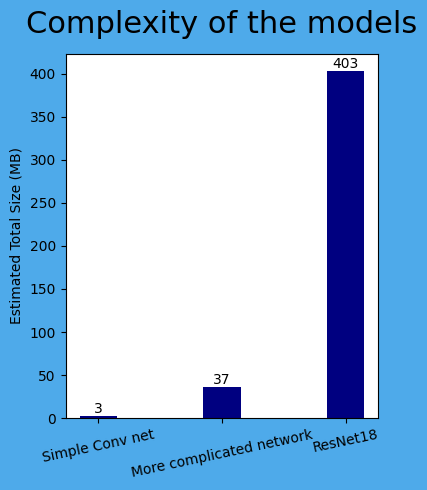

In [7]:
fig, ax = plt.subplots(figsize=(4,5), facecolor='#4eaaea')
fig.patch.set(lw=5, ec='#4eaaea')
ax.set_title('Complexity of the models', pad=15, fontsize=22)
bars = ax.bar(
    [1,2,3],
    [2.59, 36.51, 403.02],
    width=[0.3]*3,
    align="center",
    color="navy",
    tick_label=["Simple Conv net", "More complicated network", "ResNet18"]
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=12, ha='center')
ax.set_ylabel('Estimated Total Size (MB)')
ax.bar_label(bars, label_type='edge', fmt='%.0f')
fig.tight_layout()
plt.show();

<a id="train"></a>
# <p style="background-color:#4eaaea; font-family:calibri; color:black; font-size:135%; text-align:center; border-radius:20px 5px;">Step 5 | Training curves</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%">
<font color=#000000>
You can check the training loops in the /src/trainings.py<br>
There results are as follows:<br><br>

<img src="data/Conv_1.png" style="width:700px;">
<img src="data/Conv_2.png" style="width:700px;">
<img src="data/ResNet18.png" style="width:700px;">

We can see as the complexity of the models __increases__ the number of epochs to get optimal results __decreases__.
</font>

<a id="evaluation"></a>
# <p style="background-color:#4eaaea; font-family:calibri; color:black; font-size:135%; text-align:center; border-radius:20px 5px;">Step 6 | Evaluating on Test Data, Results</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%">
<font color=#000000>
For the evaluation we will use the test set(10k images).<br>
The primary metric that we will calculate is accuracy.<br>
The results are as follows:

|              | **Simple Conv net** | **More complicated network** | **ResNet18** |
|--------------|--------------------:|-----------------------------:|--------------|
| **Accuracy** |        62.10%       |            79.43%            |    85.35%    |


</font>

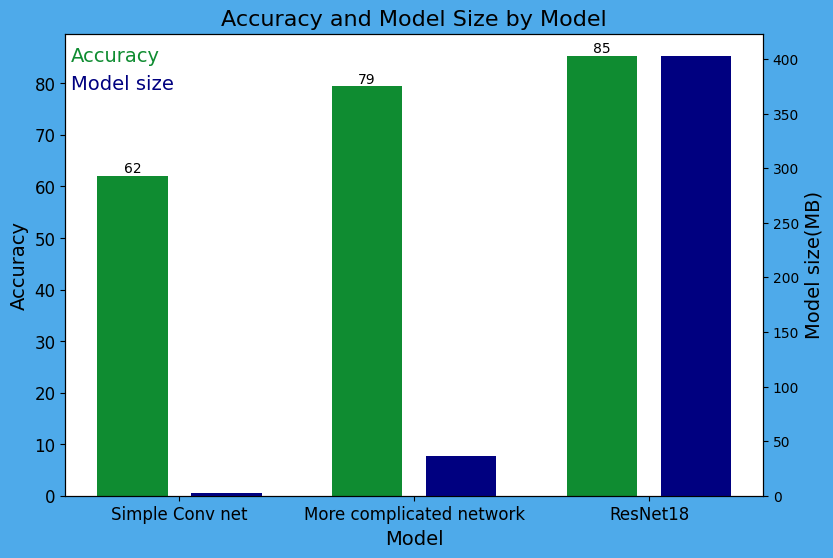

In [22]:
accuracies = [62.10, 79.43, 85.35]
models_size = [2.59, 36.51, 403.02]
models_names = ["Simple Conv net", "More complicated network", "ResNet18"]
index = np.arange(len(models_names)) 

bar_width = 0.3
baroffset = 0.2

fig,ax = plt.subplots(figsize=(9,6), facecolor='#4eaaea')
fig.patch.set(lw=5, ec='#4eaaea')
bars = ax.bar(x=index-baroffset,height=accuracies,width=bar_width,color='#0f8c31')
ax.set_xticks(index,labels=models_names,fontsize=12)
ax.set_xlabel('Model',fontsize='14')
ax.set_ylabel('Accuracy',fontsize='14')
ax.bar_label(bars, label_type='edge', fmt='%.0f')
ax.set_title('Accuracy and Model Size by Model',fontsize=16)
for item in ax.get_yticklabels():
    item.set_fontsize(12)
    
ax2 = ax.twinx()
ax2.bar(x=index+baroffset,height=models_size,width=bar_width,color='navy')
ax2.set_ylabel('Model size(MB)',fontsize='14')

ax.text(0.0075,0.94, f"Accuracy",fontsize=14,
        color='#0f8c31',transform=ax.transAxes)
ax.text(0.0075,0.88, f"Model size",fontsize=14,
        color='navy',transform=ax.transAxes);

<div style="border-radius:12px; padding: 20px; background-color: #4eaaea; font-size:125%">
<font color=#000000>
We can observe, that, model size increases much faster that accuracy.<br>
If we assume quadratic trend in data, the model that will achive 90% accuracy will be around 800MB.<br>

The human result on this dataset is around 94%. [Stanford demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)

</font>